In [3]:
import tensorflow as tf
import numpy as np

In [8]:
r3 = np.array([[1, 2, 3], 
                [4, 5, 6], 
                [7, 8, 9],
                [10, 11, 12]])
print(f"dimension: {r3.ndim}")
print(f"Shape: {r3.shape}")

# tensor has 2 dimensions which means it has rank of 2  
# shape says that we have 1 matrix 4 rows and 3 columns

dimension: 2
Shape: (4, 3)


In [9]:
r4 = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
print(f"dimension: {r4.ndim}")
print(f"Shape: {r4.shape}")

# shape here means we have 3 matrices, each with 3 rows and 5 columns

dimension: 3
Shape: (3, 3, 5)


In [2]:
x = tf.ones((2,1)) # create a tensor of 2 rows and 1 column
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.random.normal((3,1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.14739363]
 [ 0.44663408]
 [-0.12610038]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform((4,2), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.39364052 0.9570054 ]
 [0.3875928  0.2627071 ]
 [0.5385846  0.3488773 ]
 [0.92318237 0.5063523 ]], shape=(4, 2), dtype=float32)


Tensor x in all of the above examples are no assignable so if you try doing
x[0,0] = 0. you will get an error. In order to have x assignable we need to wrap the tensor into a tf variable type as shown below

In [5]:
v = tf.Variable(tf.random.normal((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.08821411],
       [-0.58104384],
       [ 1.0211052 ]], dtype=float32)>


In [6]:
v.assign(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [7]:
a = tf.ones((2,2))
sq = tf.square(a)
print(sq)
sqrt = tf.sqrt(a)
print(sqrt)

d = sq + sqrt
print(d)

e = tf.matmul(sq,sqrt)
print(e)

e *= d  # multiply the tensors element wise rather than a matrix multiplication seen earlier.
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [8]:
input = tf.Variable(3.)
with tf.GradientTape() as tape:
  result = tf.square(input)

gradient = tape.gradient(result, input) # gradient/ derivative of x^2 is 2*x and therefore at x=3 grad = 6

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [9]:
# calculate second order derivative is also possible

time = tf.Variable(0.)
with tf.GradientTape() as otape:
  with tf.GradientTape() as itape:
    position = 4.9*time ** 2
  speed = itape.gradient(position, time)
acceleration = otape.gradient(speed, time)

print(f"{speed} and {acceleration}")

0.0 and 9.800000190734863


### Example of Linear Classification with Tensorflow 

In [10]:
# first create sample of records
n_samples = 1000 
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=n_samples)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=n_samples)

In [11]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [12]:
target = np.vstack((np.zeros((n_samples, 1), dtype='float32'), np.ones((n_samples, 1), dtype='float32')))

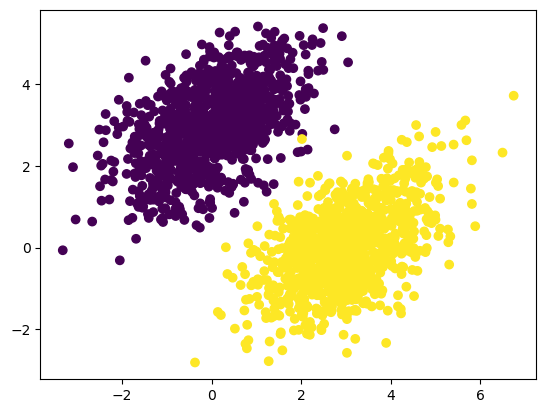

In [13]:
import matplotlib.pyplot as plt 
plt.scatter(inputs[:, 0], inputs[:, 1], c=target[:, 0])
plt.show()

### Create a linear classifier 
This will be created using tensflow operators and tensors. prediction = W * input + b 

In [14]:
input_dim = 2 
output_dim = 1 

W = tf.Variable(tf.random.uniform((input_dim, output_dim)))
b = tf.Variable(tf.zeros(output_dim))

In [15]:
# now we define the neural network 
def model(inputs):
  return tf.matmul(inputs, W) + b  

# not the loss function error 
def square_loss(targets, predictions):
  per_sample_loss = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_loss) # averaging the loss over all samples

# training step
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  # compute the derivative of the loss with respect to W and b
    W.assign_sub(grad_loss_wrt_W * learning_rate)  # W = W - grad_loss_wrt_W * learning_rate
    b.assign_sub(grad_loss_wrt_b * learning_rate)  # b = b - grad_loss_wrt_b * learning_rate 

    return loss

In [16]:
# Next step is to train the model with batches of data. 
for step in range(100):
    loss = training_step(inputs, target)
    if step % 5 == 0:
        print(f"Loss at step {step}: {loss}")

Loss at step 0: 0.9665741920471191
Loss at step 5: 0.08810120820999146
Loss at step 10: 0.06485264003276825
Loss at step 15: 0.05010475590825081
Loss at step 20: 0.0407441221177578
Loss at step 25: 0.03480282798409462
Loss at step 30: 0.031031819060444832
Loss at step 35: 0.028638320043683052
Loss at step 40: 0.027119142934679985
Loss at step 45: 0.026154903694987297
Loss at step 50: 0.025542888790369034
Loss at step 55: 0.025154437869787216
Loss at step 60: 0.024907883256673813
Loss at step 65: 0.024751393124461174
Loss at step 70: 0.024652063846588135
Loss at step 75: 0.024589020758867264
Loss at step 80: 0.024549007415771484
Loss at step 85: 0.02452360838651657
Loss at step 90: 0.024507490918040276
Loss at step 95: 0.02449725568294525


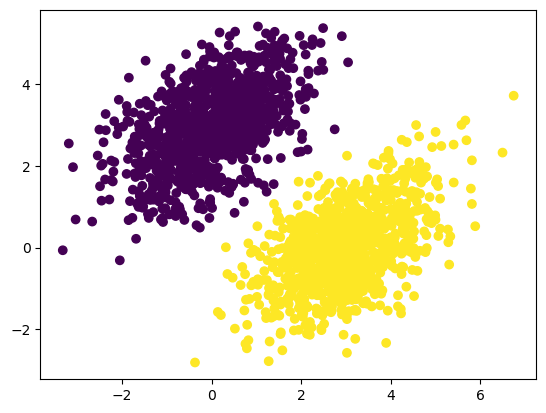

In [17]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

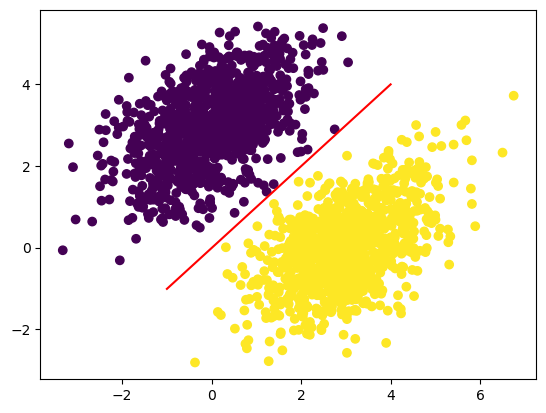

In [18]:
# now let us take the weights we have and plot them on a X-Y plane
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x - (0.5-b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)

## Things to remember 
1. The model above used a model that was a linear line y = W * x + b. 
2. Learning on 40 cycles was not as accurate the line above was a litte north of where it was earlier. 
3. As soon as 100 epochs were done the learning was higher and the line is a very good classifier for the data at hand. 